<a href="https://colab.research.google.com/github/MiguelAngel-ht/Image_Processing_/blob/main/Not_Binary_Adjust_ImEscala_and_Subplots_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# **Part 1**

In [ ]:
files = ["Fig0303(a).tif", "Fig0306(a).tif", "Fig0310(a).tif"]

In [ ]:
imgs = []
for i in files:
  imgs.append(cv.imread(i,0))

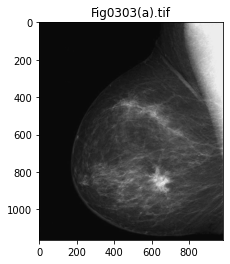

In [ ]:
plt.title(files[0])
plt.imshow(imgs[0], 'gray')
plt.show()

In [ ]:
def imadjust(x,a,b,c,d,gamma=1):
    return (((x - a) / (b - a)) ** gamma) * (d - c) + c

In [ ]:
edited_imgs = []
edited_imgs.append(cv.bitwise_not(imgs[0]))  # NEGATIVE 
edited_imgs.append(imadjust(imgs[0], imgs[0].min(),    # ADJUST
                          imgs[0].max(), 0.5, 0.75))
edited_imgs.append(np.power(imgs[0], 2))        # GAMMA 2
edited_imgs.append(np.power(imgs[0], 0.5))   # GAMMA 0.5

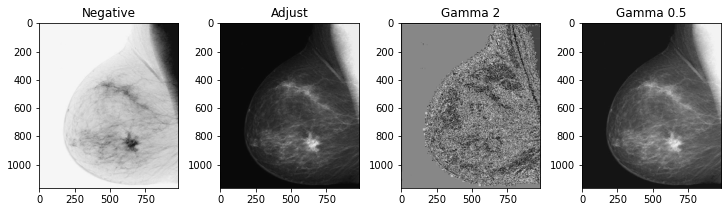

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(10, 6), constrained_layout=True)

names = ['Negative', 'Adjust', 'Gamma 2', 'Gamma 0.5']
k = 0

for ax, img in zip(axs.flat, edited_imgs):
  ax.set_title(names[k])
  ax.imshow(img, 'gray')
  k += 1

plt.show()

# **Part 2**

In [104]:
img2 = []

img2.append(cv.bitwise_not(imgs[1]))    # NEGATIVE
img2.append(imadjust(imgs[1], imgs[1].min(),    # ADJUST
                          imgs[1].max(), 0, 255))
img2.append(np.power(imgs[1], 3))        # GAMMA 2
img2.append(np.power(imgs[1], 0.8))     # GAMMA 0.5

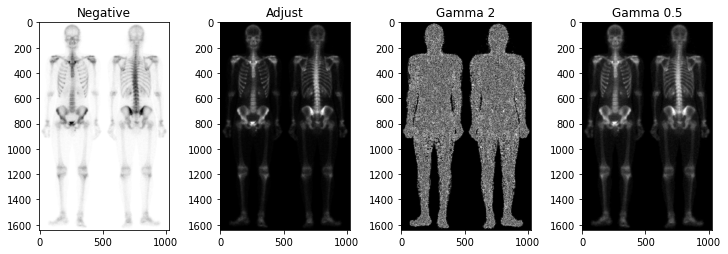

In [105]:
fig, axs = plt.subplots(1, 4, figsize=(10, 6), constrained_layout=True)

names = ['Negative', 'Adjust', 'Gamma 2', 'Gamma 0.5']
k = 0

for ax, img in zip(axs.flat, img2):
  ax.set_title(names[k])
  ax.imshow(img, 'gray')
  k += 1

plt.show()

# **Part 3**

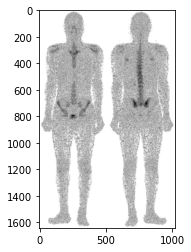

In [109]:
img_bin = img2[0] - img2[2] - img2[1]
plt.imshow(img_bin, 'gray')
plt.show()

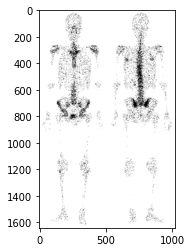

In [110]:
img_bin = cv.threshold(img_bin,0,255,cv.THRESH_BINARY)[1]
# cv.THRESH_BINARY_INV cv.THRESH_BINARY  cv.THRESH_TRUNC cv.THRESH_TOZERO cv.THRESH_TOZERO_INV
plt.imshow(img_bin, 'gray')
plt.show()

I'am not fine with this image.

# **Part 4**

The following function rescale a image from $[minf,maxf]$ and it is representing like the equation

$x' = minf + {{(x-x_{min})}\over{x_{max}-x_{min}}}(maxf-minf)$

when x value is equat to the minimum, the result is the minimum that we choose and similarly with the maximum. 

In [111]:
def ImEscala(img, minf, maxf):
  
  x_min = img.min()
  x_max = img.max()

  img = minf + ((img - x_min) / (x_max - x_min)) * (maxf - minf)

  return img

# **Parte 5**

In [112]:
ImT1 = ImEscala(imgs[2], 0, 255)
ImT2 = ImEscala(imgs[2], 0, 1)

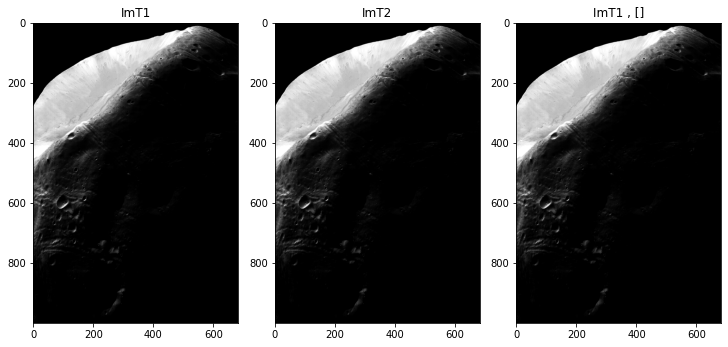

In [113]:
fig, axs = plt.subplots(1, 3, figsize=(10, 6), constrained_layout=True)

axs[0].imshow(ImT1, 'gray')
axs[0].set_title('ImT1')
axs[1].imshow(ImT2, 'gray')
axs[1].set_title('ImT2')
axs[2].imshow(ImT1, 'gray', vmin = ImT1.min(), vmax = ImT1.max())
axs[2].set_title('ImT1 , []')

plt.show()